In [36]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
pd.options.display.float_format = '{:.2f}'.format
import statsmodels.api as sm

# NOTE: I've commented out the plt.savefig() on the theory that 
# not everyone wants a whole bunch of random image files appearing
# unannounced! Code has been tested both with and without this function.

In [37]:
# Read in file and drop the final line to make it easier to manipulate.
methane_estimates = pd.read_excel('ch4_2015-2021.xlsx', sheet_name='Sheet1')
methane_estimates = methane_estimates.iloc[:-1,:] 

In [38]:
# total outputs over all years
methane_estimates['total_all_years'] = methane_estimates.iloc[:,2:9].sum(axis=1)

Text(0.5, 1.0, 'Total Estimated Methane Produced, by Country')

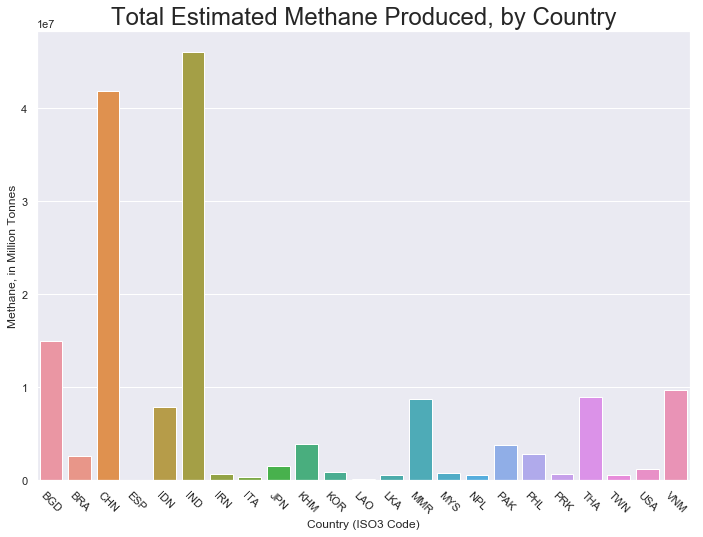

In [39]:
#maybe use?

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=methane_estimates,x='iso3_country',y='total_all_years')
plt.xticks(rotation=-45)
plt.xlabel("Country (ISO3 Code)")
plt.ylabel("Methane, in Million Tonnes")
plt.title("Total Estimated Methane Produced, by Country", size=24)
#plt.savefig('total.png')

In [40]:
#tidy up the dataset and melt it to make line graphs easier to make
methane_estimates_melt = methane_estimates.drop(['country_name','total_all_years'],axis=1)
methane_estimates_melt=methane_estimates_melt.melt(id_vars=["iso3_country"],var_name=["year"],value_name="emission_value")
methane_estimates_melt['year'] = methane_estimates_melt['year'].str.strip().str[-4:]

Text(0.5, 1.0, 'Total Rice Harvest Methane Emissions by Country')

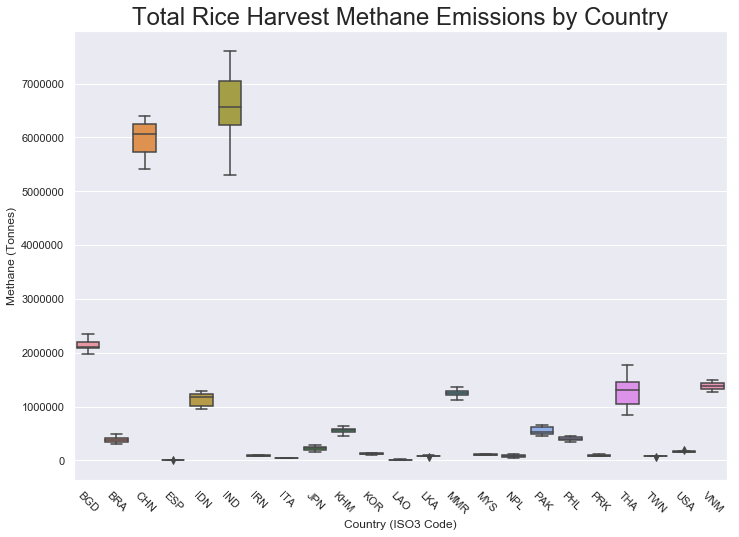

In [41]:
# Maybe use? I like being able to see the range each country is, or is not, producing
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="iso3_country", y="emission_value", data=methane_estimates_melt)
plt.xticks(rotation=-45)
plt.xlabel("Country (ISO3 Code)")
plt.ylabel("Methane (Tonnes)")
plt.title("Total Rice Harvest Methane Emissions by Country", size=24)
#plt.savefig('total_box.png')

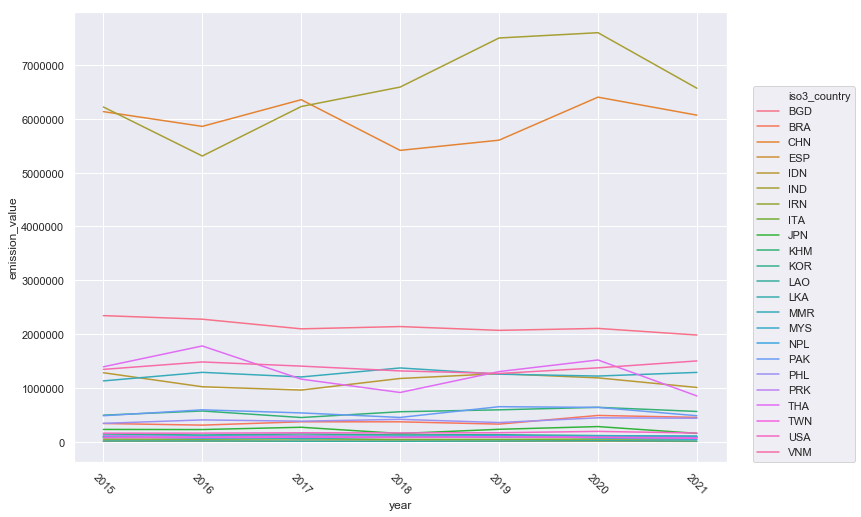

In [42]:
# probably won't use this, it's very spaghetti and doesn't really give anything that isn't better expressed in other viz
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='year', y='emission_value', data=methane_estimates_melt,
          hue='iso3_country')
plt.xticks(rotation=-45)
plt.legend(loc=(1.04,0))

In [43]:
# calculate emission changes year on year, and then make a more manageable/human-readable dataframe

methane_estimates['change2016'] = methane_estimates['tCH4_2016'] - methane_estimates['tCH4_2015']
methane_estimates['change2017'] = methane_estimates['tCH4_2017'] - methane_estimates['tCH4_2016']
methane_estimates['change2018'] = methane_estimates['tCH4_2018'] - methane_estimates['tCH4_2017']
methane_estimates['change2019'] = methane_estimates['tCH4_2019'] - methane_estimates['tCH4_2018']
methane_estimates['change2020'] = methane_estimates['tCH4_2020'] - methane_estimates['tCH4_2019']
methane_estimates['change2021'] = methane_estimates['tCH4_2021'] - methane_estimates['tCH4_2020']
methane_estimates['overall_change'] = methane_estimates['tCH4_2021'] - methane_estimates['tCH4_2015']

methane_estimates_changes = methane_estimates.drop(['tCH4_2015','tCH4_2016','tCH4_2017','tCH4_2018','tCH4_2019','tCH4_2020','tCH4_2021','total_all_years','overall_change'],axis=1)

In [44]:
# calculate the absolute change by summing the absolute value of each YOY change, and then melt the dataset
methane_estimates['absolute_change'] = methane_estimates['change2016'].abs() + methane_estimates['change2017'].abs() + methane_estimates['change2018'].abs() + methane_estimates['change2019'].abs() + methane_estimates['change2020'].abs() + methane_estimates['change2021'].abs()

methane_estimates_changes_melt = methane_estimates.drop(['iso3_country','tCH4_2015','tCH4_2016','tCH4_2017','tCH4_2018','tCH4_2019','tCH4_2020','tCH4_2021','overall_change','total_all_years','absolute_change'],axis=1)
methane_estimates_changes_melt=methane_estimates_changes_melt.melt(id_vars=["country_name"],var_name=["change_year"],value_name="emission_value")


Text(0.5, 1.0, 'Estimated Methane Productions Changes, Year-on-Year')

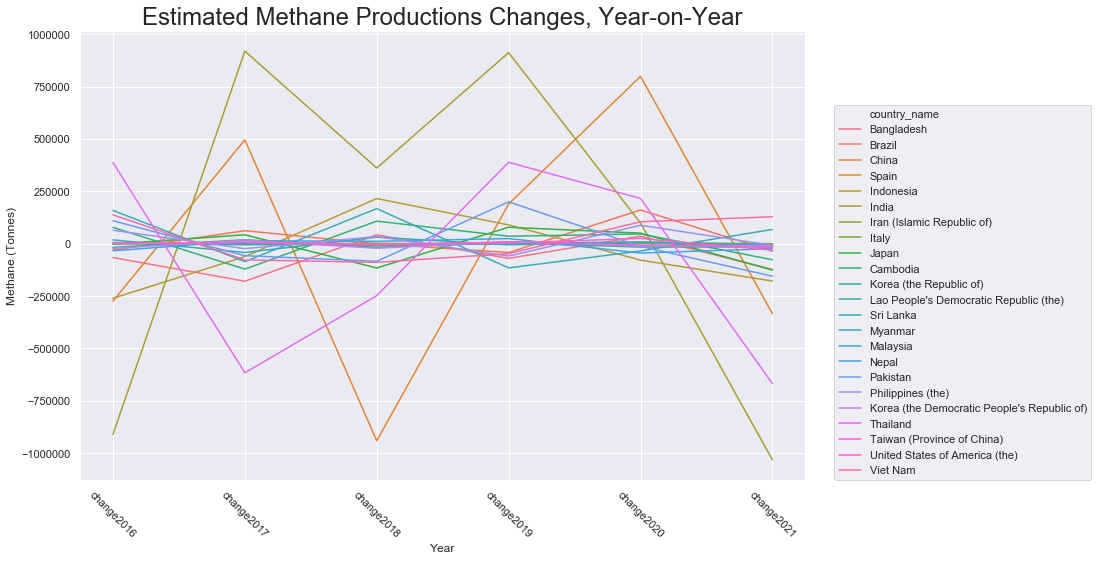

In [45]:
# Definitely use; it needs a little explanation but it shows the chaotic vs not countries

sns.set(rc={'figure.figsize':(13,8.27)})

sns.lineplot(x='change_year', y='emission_value', data=methane_estimates_changes_melt,
          hue='country_name')
plt.xticks(rotation=-45)
plt.legend(loc=(1.04,0))
plt.xlabel("Year")
plt.ylabel("Methane (Tonnes)")
plt.title("Estimated Methane Productions Changes, Year-on-Year", size=24)
#plt.savefig('all_yoy_changes.png')

In [46]:
# Get countries with smallest and largest absolute changes, break them into datasets, and melt

smallest_abs_change = methane_estimates.sort_values('absolute_change').head()
smallest_abs_change_melt = smallest_abs_change.drop(['iso3_country','change2016','change2017','change2018','change2019','change2020','change2021','overall_change','total_all_years','absolute_change'],axis=1)
smallest_abs_change_melt=smallest_abs_change_melt.melt(id_vars=["country_name"],var_name=["year"],value_name="emission_value")
smallest_abs_change_melt['year'] = smallest_abs_change_melt['year'].str.strip().str[-4:]

largest_abs_change = methane_estimates.sort_values('absolute_change').tail()
largest_abs_change_melt = largest_abs_change.drop(['iso3_country','change2016','change2017','change2018','change2019','change2020','change2021','overall_change','total_all_years','absolute_change'],axis=1)
largest_abs_change_melt=largest_abs_change_melt.melt(id_vars=["country_name"],var_name=["year"],value_name="emission_value")
largest_abs_change_melt['year'] = largest_abs_change_melt['year'].str.strip().str[-4:]

Text(0.5, 1.0, 'Estimated Methane Production Per Year \n 5 Countries with Smallest Absolute Change')

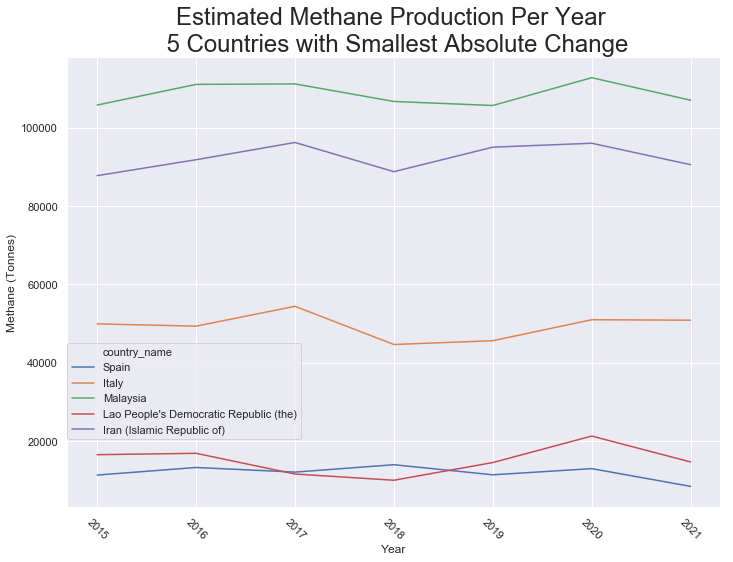

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='year', y='emission_value', data=smallest_abs_change_melt,
          hue='country_name')
plt.xticks(rotation=-45)
plt.legend(loc=(0,.15))
plt.xlabel("Year")
plt.ylabel("Methane (Tonnes)")
plt.title("Estimated Methane Production Per Year \n 5 Countries with Smallest Absolute Change", size=24)
#plt.savefig('smallest_abs_yoy_changes.png')

Text(0.5, 1.0, 'Estimated Methane Production Per Year \n 5 Countries with Largest Absolute Change')

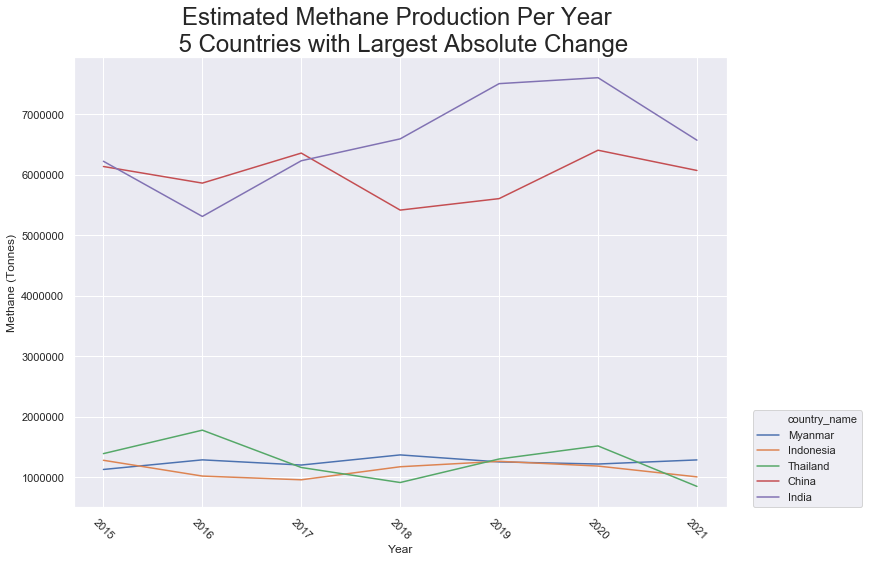

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='year', y='emission_value', data=largest_abs_change_melt,
          hue='country_name')
plt.xticks(rotation=-45)
plt.legend(loc=(1.04,0))
plt.xlabel("Year")
plt.ylabel("Methane (Tonnes)")
plt.title("Estimated Methane Production Per Year \n 5 Countries with Largest Absolute Change", size=24)
#plt.savefig('largest_abs_yoy_changes.png')

Text(0.5, 1.0, 'Estimated Methane Production Per Year, Selected Countries')

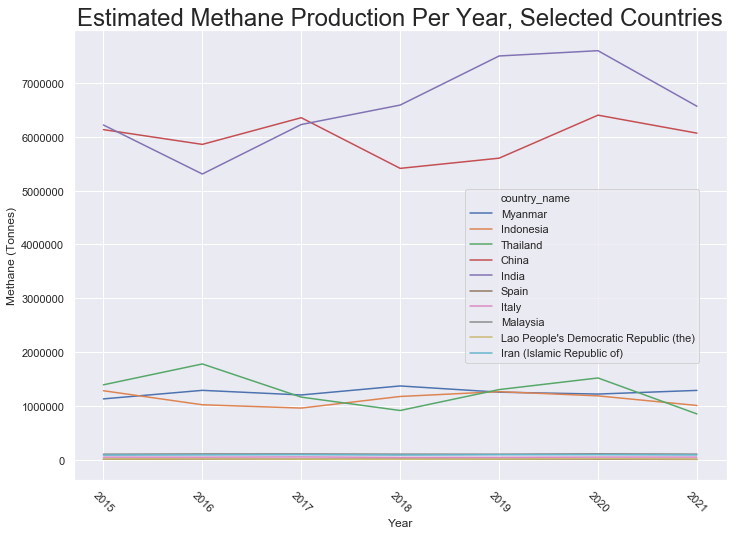

In [49]:
# what do they look like on a graph together?
abs_change_extremes = pd.concat([largest_abs_change_melt, smallest_abs_change_melt])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='year', y='emission_value', data=abs_change_extremes,
          hue='country_name')
plt.xticks(rotation=-45)
plt.legend(loc=(.6,.26))
plt.xlabel("Year")
plt.ylabel("Methane (Tonnes)")
plt.title("Estimated Methane Production Per Year, Selected Countries", size=24)
#plt.savefig('all_abs_yoy_changes.png')

Text(0.5, 1.0, 'Linear Relationship between Change \n and Total Estimated Methane Production\n')

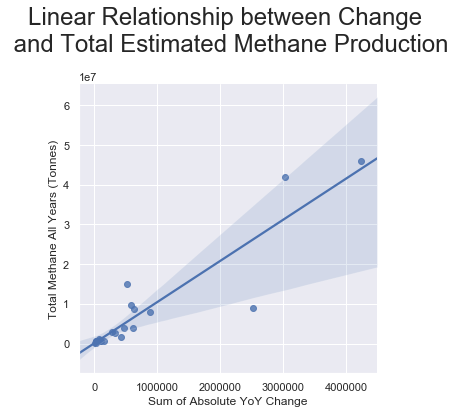

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(x='absolute_change',y='total_all_years',data=methane_estimates)
plt.xlabel("Sum of Absolute YoY Change")
plt.ylabel("Total Methane All Years (Tonnes)")
plt.title("Linear Relationship between Change \n and Total Estimated Methane Production\n", size=24)
#plt.savefig('linear.png')

In [51]:
X = methane_estimates["absolute_change"]
y = methane_estimates["total_all_years"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_all_years   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     159.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.47e-11
Time:                        11:07:11   Log-Likelihood:                -386.69
No. Observations:                  23   AIC:                             775.4
Df Residuals:                      22   BIC:                             776.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
absolute_change    10.3913      0.823     12.633      0.000       8.685      12.097
==============================================================================
Omnibus:                       18.644   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.241
Skew:                          -1.244   Prob(JB):                     8.19e-09
Kurtosis:                       8.716   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""